# Ch10_1.K-평균 군집분석

## 1.기본 package 설정

In [1]:
## 기본
import numpy as np  # numpy 패키지 가져오기
import pandas as pd # pandas 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화

## 모델구축
from sklearn.cluster import KMeans


## 2.데이터 가져오기

### 2.1 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [2]:
utilities_df = pd.read_csv('Utilities.csv')
utilities_df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [3]:
utilities_df.shape

(22, 9)

In [4]:
# 자료구조 살펴보기
utilities_df.keys()

Index(['Company', 'Fixed_charge', 'RoR', 'Cost', 'Load_factor',
       'Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost'],
      dtype='object')

## 3.데이터 전처리

### 3.1 회사이름을 row 이름으로 변경

In [5]:
columns = ['Fixed_charge', 'RoR', 'Cost', 'Load_factor', 'Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost']
columns

['Fixed_charge',
 'RoR',
 'Cost',
 'Load_factor',
 'Demand_growth',
 'Sales',
 'Nuclear',
 'Fuel_Cost']

In [6]:
labels = np.array(utilities_df['Company'])
labels

array(['Arizona ', 'Boston ', 'Central ', 'Commonwealth', 'NY',
       'Florida ', 'Hawaiian ', 'Idaho', 'Kentucky', 'Madison ', 'Nevada',
       'New England', 'Northern', 'Oklahoma', 'Pacific ', 'Puget',
       'San Diego', 'Southern', 'Texas', 'Wisconsin', 'United',
       'Virginia'], dtype=object)

In [7]:
utilities_df = utilities_df.drop(['Company'], axis=1)
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


### 3.2 수치형 데이터 표준화 

In [8]:
stdsc = StandardScaler()
utilities_df = pd.DataFrame(stdsc.fit_transform(utilities_df))

In [9]:
utilities_df.index = labels
utilities_df.columns = columns

### 3.3 회사명 레이블 연결

In [10]:
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073
Madison,0.032779,0.758801,0.716081,-0.912516,-0.177548,-0.708993,1.657945,-0.882967


## 4.군집화

In [11]:
km = KMeans(n_clusters=6, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            random_state=1)
# km.fit(utilities_df)
y_km = km.fit_predict(utilities_df)

## 5.군집확인

In [12]:
y_km

array([3, 0, 3, 0, 5, 3, 2, 1, 2, 0, 1, 2, 0, 3, 4, 1, 4, 3, 3, 0, 4, 0])

In [13]:
cluster = pd.DataFrame(y_km)

In [14]:
cluster.index = labels
cluster.columns = ['cluster']

In [15]:
cluster

,cluster
Arizona,3
Boston,0
Central,3
Commonwealth,0
NY,5
Florida,3
Hawaiian,2
Idaho,1
Kentucky,2
Madison,0


## 6.엘보우 챠트(Elbow Method)

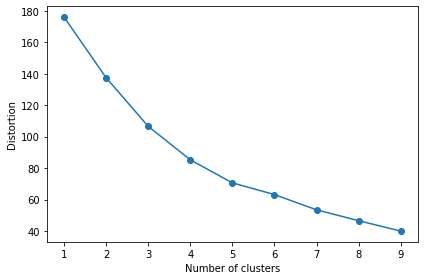

In [16]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(utilities_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

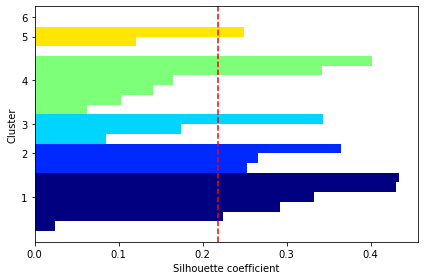

In [17]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(utilities_df, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()